In [1]:
%matplotlib inline
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
NNt1 = pd.read_excel('./target_decoy/Ntarget(query)/TPRP_target.xlsx')
NNt1.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,Ntarget.00001.00001.2,1,AAAAAAAAAAAAAAAGAGAGAK/2,0.839,0.627,[2],0,0.000034,82,0.0737,...,-1,0,0,(),Normal,Unk,Unk,0,139,NaN
1,Ntarget.00002.00002.3,1,AAAAAAAAAAAAAAAGAGAGAK/3,0.779,0.414,[2],0,0.000000,110,0.0970,...,-1,0,0,(),Normal,Unk,Unk,0,1938,NaN
2,Ntarget.00003.00003.2,1,AAAAAAAAAAAPPAPPEGASPGDSAR/2,0.854,0.648,[2],0,0.000000,31,0.0800,...,-1,0,0,(),Normal,Unk,Unk,0,4203,NaN
3,Ntarget.00004.00004.3,1,AAAAAAAAAAAPPAPPEGASPGDSAR/3,0.787,0.484,[2],0,0.000000,59,0.0950,...,-1,0,0,(),Normal,Unk,Unk,0,5530,NaN
4,Ntarget.00005.00005.2,1,AAAAAAAAAVSR/2,0.831,0.352,[2],0,0.000000,150,0.0990,...,-1,0,0,(),Normal,Unk,Unk,0,7773,NaN


In [3]:
NNd1 = pd.read_excel('./target_decoy/Ntarget(query)/TPRP_decoy.xlsx')
NNd1.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,Ntarget.00411.00411.2,1,ADTPDMK/2,0.268,0.133,[2],0,-0.004,4,0.123,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q16543|CDC37_HUMAN(pre=K,post=Y)",822564135
1,Ntarget.00883.00883.2,1,GSSFAAR/2,0.127,0.001,[2],0,0.000,2,0.127,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|P30838|AL3A1_HUMAN(pre=R,post=T)",557065207
2,Ntarget.01284.01284.2,1,AALLQDK/2,0.534,0.218,[2],0,0.006,43,0.139,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q13813|SPTN1_HUMAN(pre=K,post=H)",612580694
3,Ntarget.01304.01304.3,1,NEPRIARR/3,0.405,0.004,[2],0,0.333,50,0.125,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|P50402|EMD_HUMAN(pre=R,post=A)",881032527
4,Ntarget.01582.01582.2,1,AAAGISK/2,0.327,0.217,[2],0,0.000,2,0.219,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|P34932|HSP74_HUMAN(pre=R,post=S)",908090512


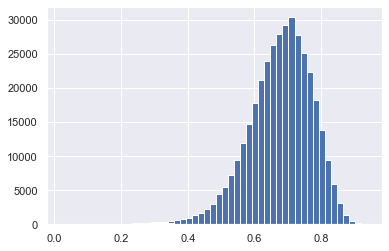

In [4]:
nnt1 = plt.hist(NNt1['Dot'], bins = 50)
nnd1 = plt.hist(NNd1['Dot'], bins = 50)

0.01808
0.014580000000000003


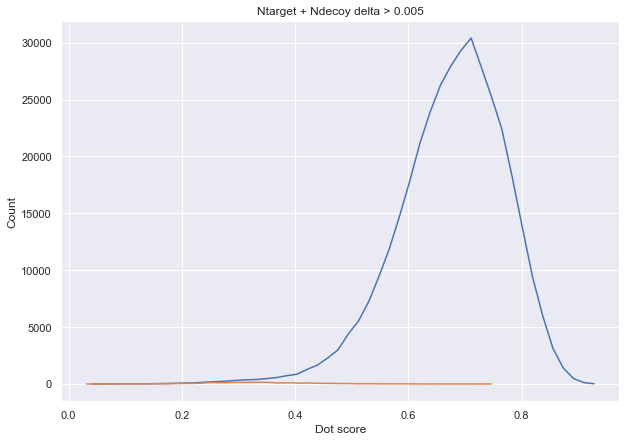

In [6]:
print(nnt1[1][1] - nnt1[1][0])
print(nnd1[1][1] - nnd1[1][0])

plt.figure(figsize = (10, 7))
plt.xlabel('Dot score')
plt.ylabel('Count')
plt.title('Ntarget + Ndecoy delta > 0.005')
plt.plot(nnt1[1][:-1] + 0.009, nnt1[0])
plt.plot(nnd1[1][:-1] + 0.007, nnd1[0])
plt.show()

In [7]:
print(len(NNt1))
print(len(NNd1))

371072
2261


In [8]:
score = 0

for i in range(0, 1000):
    score += 0.001
    print('score: ' , score)
    
    nntarget = NNt1['Dot'] >= score
    nnt = NNt1[nntarget]
    
    nndecoy = NNd1['Dot'] >= score
    nnd = NNd1[nndecoy]
    
    print('nnt: ', len(nnt))
    print('nnd: ', len(nnd))
    print('FDR: ', len(nnd) / len(nnt))
    print('\n')
    
    if (len(nnd) / len(nnt)) <= 0.01:
        print(len(nnd))
        print(len(nnt))
        print(len(nnd) / len(nnt))
        print(score)
        break
"""
결과
score:  0.001
nnt:  371072
nnd:  2261
FDR:  0.006093157123145912
"""

score:  0.001
nnt:  371072
nnd:  2261
FDR:  0.006093157123145912


2261
371072
0.006093157123145912
0.001


'\n결과\nscore:  0.5970000000000004\nnnt:  104914\nnnd:  1037\nFDR:  0.009884286177249938\n'